#### 2023-05-08

##### 1교시

In [1]:
# 단순 선형회귀에서 회귀선에 대한 공식이 무엇인가? 찾고자 하는 회귀선의 식은?
y = b0 + b1*x

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
data = datasets.load_diabetes()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# data, target, feature_names 를 써서 데이터 프레임으로 만듭시다.
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# X=bmi, y=target 일떼 단순선형회귀분석을 하시오.
lr = LinearRegression()
lr.fit(df['bmi'].values.reshape(-1,1),df['target'])

LinearRegression()

In [ ]:
# 그래프로 나타내시오.

In [7]:
import matplotlib.pyplot as plt

In [14]:
X = df['bmi']
y = df['target'] 

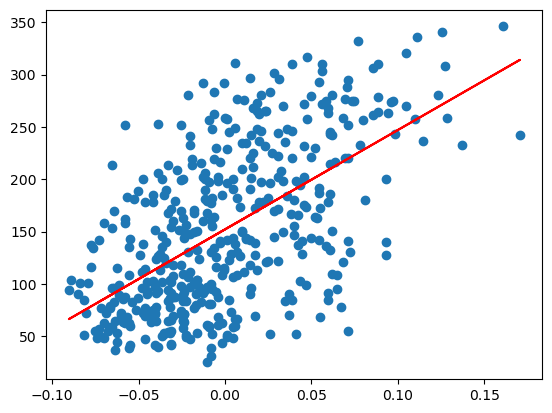

In [15]:
plt.scatter(X, y)
plt.plot(X, lr.intercept_+ X*lr.coef_, c = 'red') 

In [16]:
import os

In [18]:
os.getcwd()

'/Users/sonsoohan/Downloads/Python'

In [46]:
sleep = pd.read_csv('/Users/sonsoohan/Downloads/sleep.csv')

In [47]:
# 결측치가 있는 행을 삭제하시오.
sleep.isna().sum()
sleep.dropna(inplace = True)

In [48]:
# sleep 데이터 중  Gender와 Smoking status 열을 원핫인코딩하여 객체에 저장하시오(덮어쓰기 가능
sleep = pd.get_dummies(sleep, columns = ['Gender', 'Smoking status'])
sleep[:2]

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,1,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,1,0,0,1
1,2,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,0,1,0,1


In [49]:
# target을 Sleep efficiency로, 나머지는 feature로 하여 8:2로 학습 및 테스트 데이터를 분할하고, train_test_split(X,y,test_size = 0.2)
from sklearn.model_selection import train_test_split
X = sleep.drop('Sleep efficiency', axis=1)
y = sleep['Sleep efficiency']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [50]:
# 회귀트리로 그리드서치하여 최적의 하이퍼파라미터와 그 때의 RMSE를 출력하시오.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_reg = DecisionTreeRegressor()
params = {'max_depth':[2,3,4,5],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
grid_dt = GridSearchCV(dt_reg, param_grid = params, cv = 5)

In [51]:
grid_dt.fit(X_train,y_train)

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '2021-09-26 00:00:00'

--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '2021-04-17 22:30:00'


In [38]:
grid_dt.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

##### 2교시

In [52]:
from sklearn.datasets import make_blobs

In [54]:
X,y = make_blobs(n_samples = 200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

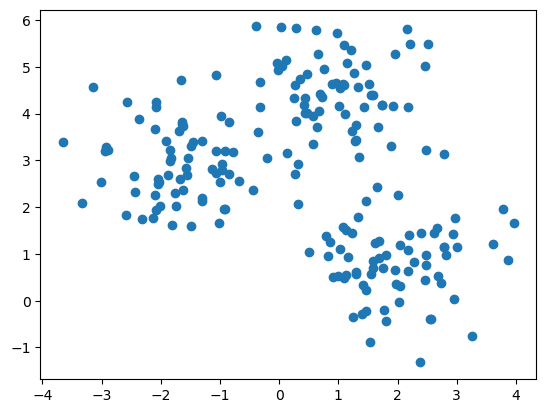

In [56]:
plt.scatter(X[:,0],X[:,1])

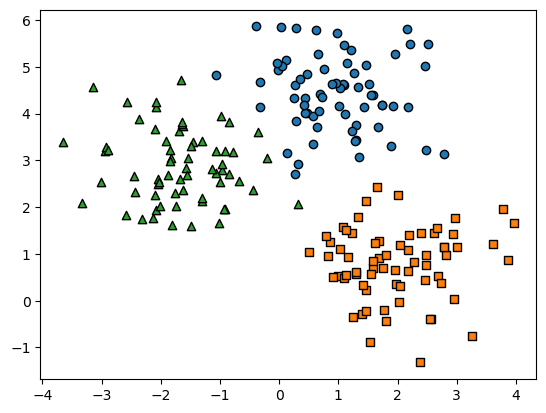

In [57]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=200, random_state=0)
kmeans.fit(X)

/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=3, random_state=0)

/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


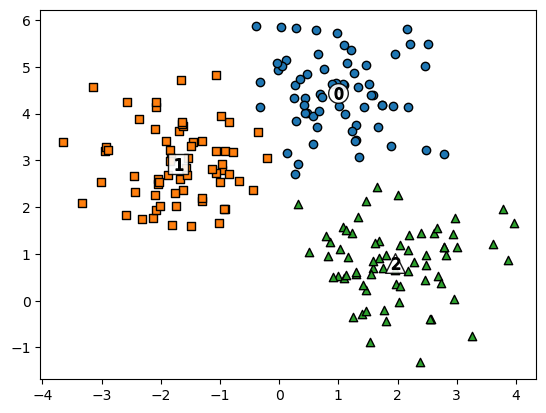

In [60]:
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show() 


In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

##### 5교시

In [67]:
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

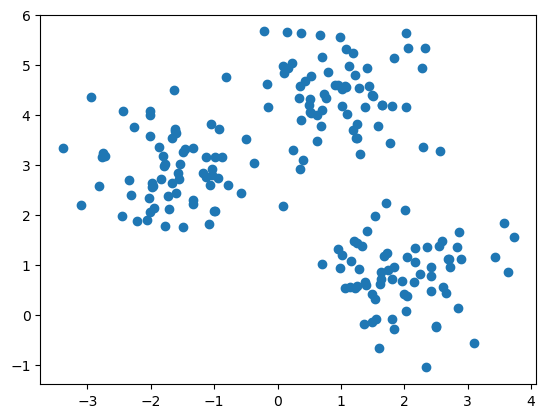

In [71]:
plt.scatter(X[:,0],X[:,1])

In [74]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth=1.8)
meanshift.fit(X)
cluster_labels = meanshift.predict(X)

In [75]:
np.unique(cluster_labels)

array([0, 1, 2])

In [76]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(X)

1.8158484154517098

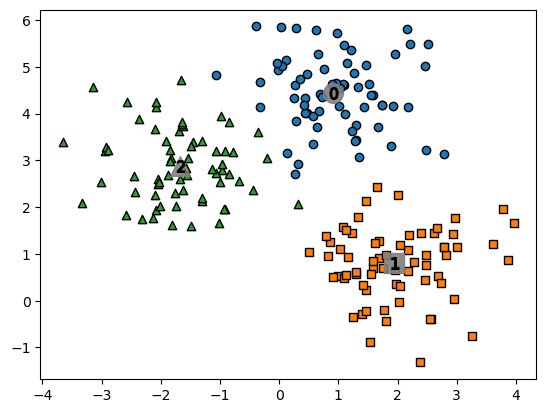

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show() 

In [81]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--") 

/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


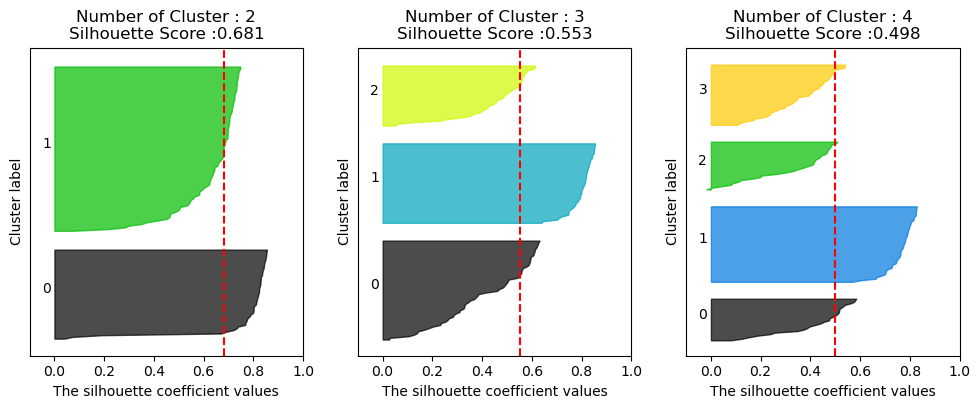

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4],iris.data)

In [94]:
X = iris.data
y = iris.target
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
gmm_labels = gmm.predict(X)

In [95]:
np.unique(gmm_labels)

array([0, 1, 2])

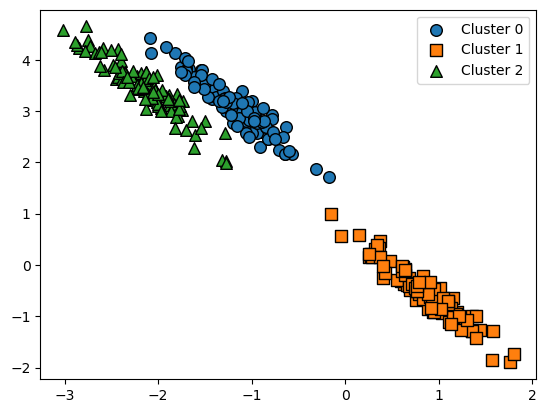

In [98]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    
plt.show()


from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False) 

/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


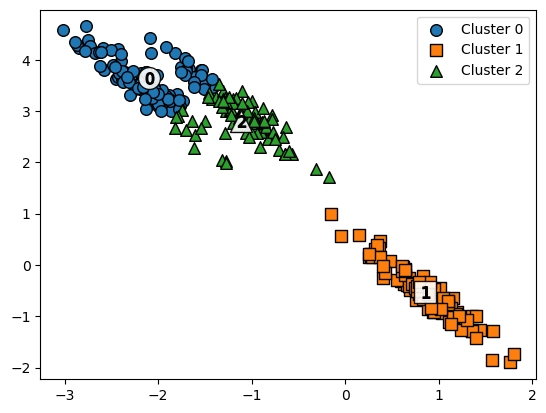

In [100]:
kmeans = KMeans(n_clusters=3, max_iter=200, random_state=0)
kmeans.fit(X_aniso)
kmeans_label = kmeans.predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter = True)

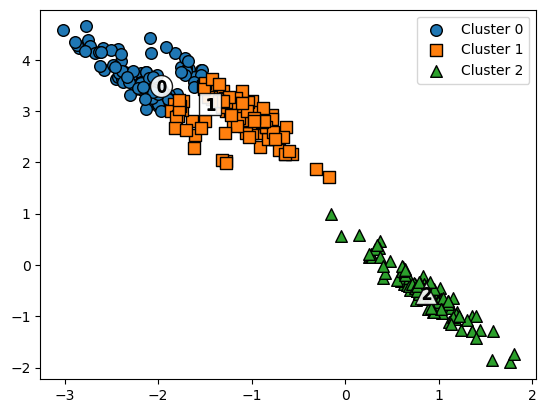

In [104]:
meanshift = MeanShift(bandwidth=0.6)
meanshift.fit(X_aniso)
meanshift_label = meanshift.predict(X_aniso)
clusterDF['meanshift_label']=meanshift_label
visualize_cluster_plot(meanshift,clusterDF,'meanshift_label',iscenter = True)

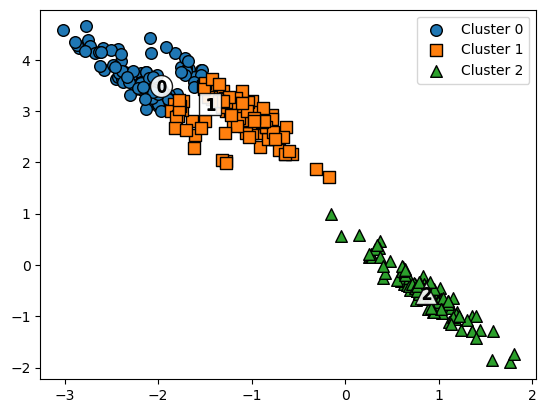

In [106]:
meanshift = MeanShift(bandwidth=0.6)
meanshift.fit(X_aniso)
meanshift_label = meanshift.predict(X_aniso)
clusterDF['meanshift_label']=meanshift_label
visualize_cluster_plot(meanshift,clusterDF,'meanshift_label',iscenter = True)

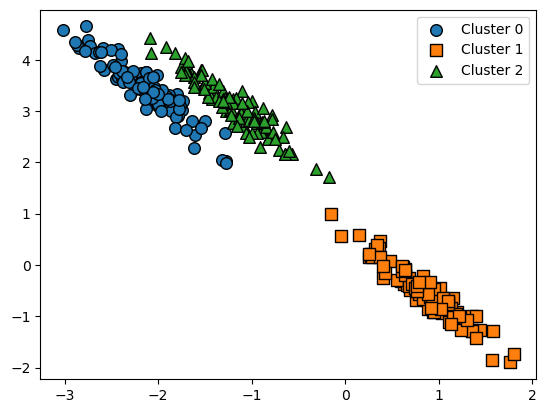

In [108]:
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(X_aniso)
gmm_label = gmm.predict(X_aniso)
clusterDF['gmm_label']=gmm_label
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter = False)

##### 6교시

In [110]:
from sklearn.datasets import make_circles

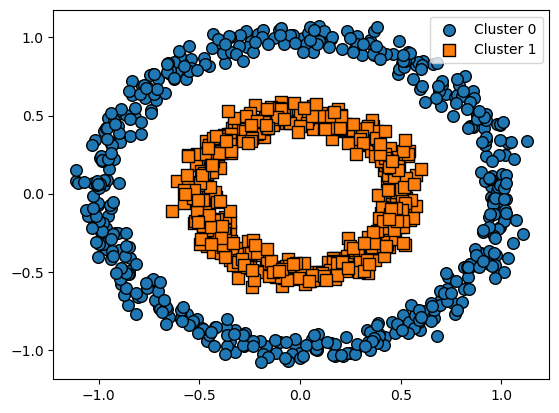

In [112]:
X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,factor=0.5)
clusterDF = pd.DataFrame(data = X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


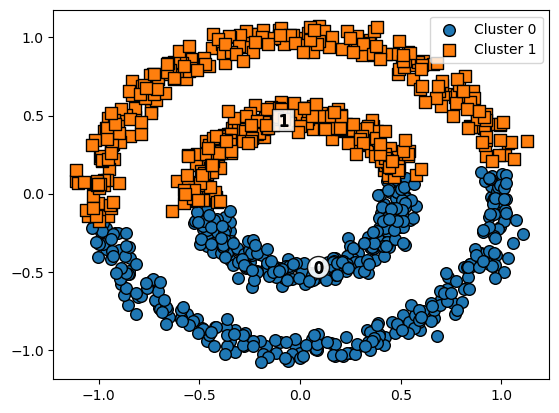

In [115]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_label
visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter = True)

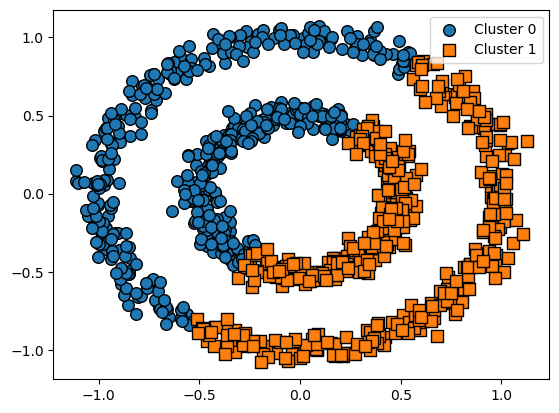

In [123]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label
visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter = False)

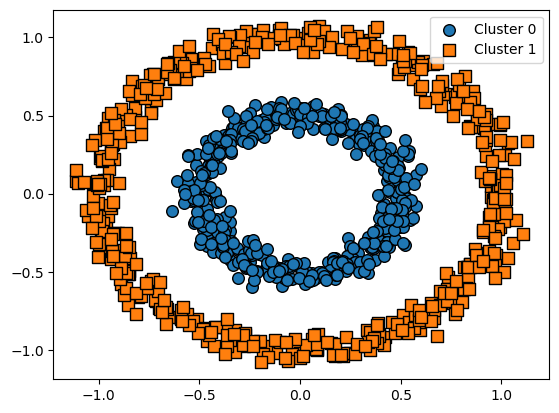

In [125]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_label
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter = False)